# Stress Detection System

## Importing Libraries

In [1]:
import pandas as pd             # For data manipulation 
import numpy as np              # For data mathematical calculations
import matplotlib.pyplot as plt # For graphs
import seaborn as sns           # For graphs
import warnings                 # For warnings
warnings.filterwarnings("ignore")           # For ignoring  warnings
from sklearn.preprocessing import MinMaxScaler        # For data scaling
from sklearn.feature_selection import SelectKBest     # For selecting k best features
from sklearn.feature_selection import chi2            # For chi-square test for feature selection
%matplotlib inline            
from sklearn.preprocessing import LabelEncoder   # For Label Encoding
from sklearn.neural_network import MLPClassifier    # For Neural Network
from sklearn.ensemble import RandomForestClassifier       # For Random Forest trees
from sklearn.metrics import accuracy_score, f1_score, precision_score, precision_recall_curve, classification_report       
                                                      # For evaluation metrics

## Import data

### Data Balancing

In [9]:
# For importing the data into environment
application_train = pd.read_csv("train.csv")
application_test = pd.read_csv("test.csv")

## Exploratory Data Analysis

In [10]:
# To show top 10 rows of train data
application_train.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,7.026695,...,11.027460,0.318490,6.799829,3462.418453,13.706252,0.072959,0.582616,1.128483,2,no stress
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,7.528700,...,1.489796,0.119828,0.307425,1243.278879,324.282351,0.003084,2.161461,1.158004,2,no stress
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,6.703994,...,28.913453,1.501528,6.194082,1925.601664,15.144441,0.066031,1.110739,1.146555,2,no stress
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,10.349326,...,20.757787,0.659188,2.026982,3148.992003,48.334430,0.020689,2.174233,1.122471,2,interruption
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,8.498966,...,2.572459,0.150800,0.490102,1705.869787,203.039304,0.004925,2.171600,1.176054,2,no stress


In [11]:
# To show top 10 rows of test data
application_test.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
5,831.632295,836.596795,62.069042,12.576667,12.576557,4.935254,72.562697,4.533333,0.266667,8.895937,...,27.517012,1.280470,4.480715,2148.978043,21.317867,0.046909,2.177956,1.202543,2,time pressure
6,832.894819,834.290000,84.999202,14.147805,14.147257,6.007943,72.816960,7.400000,0.000000,10.006960,...,14.771837,0.594187,1.536975,2486.058114,64.062874,0.015610,2.186655,1.183980,2,interruption
7,719.439761,717.521215,57.971358,9.350848,9.350507,6.199583,83.951285,1.666667,0.133333,6.614013,...,34.518960,2.195016,8.979104,1572.606599,10.136969,0.098649,2.195558,1.192361,2,no stress
8,997.711161,998.858135,80.215509,22.116768,22.116729,3.626909,60.537570,26.866667,1.933333,15.644108,...,8.956415,0.245826,0.519306,3643.391597,191.564789,0.005220,2.197198,1.224772,2,interruption
9,751.381602,760.687035,88.536256,13.999524,13.998405,6.324233,81.125490,6.733333,0.600000,9.901671,...,32.101300,0.996415,3.079247,3221.680332,31.475473,0.031771,2.071096,1.139724,2,no stress


In [12]:
# To know datastructure
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

In [13]:
# To know datastructure
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   HR                 41033 non-null  float64
 7   pNN25              41033 non-null  float64
 8   pNN50              41033 non-null  float64
 9   SD1                41033 non-null  float64
 10  SD2                41033 non-null  float64
 11  KURT               41033 non-null  float64
 12  SKEW               41033 non-null  float64
 13  MEAN_REL_RR        41033 non-null  float64
 14  MEDIAN_REL_RR      41033 non-null  float64
 15  SDRR_REL_RR        41033 non-null  float64
 16  RMSSD_REL_RR       410

### Missing data

In [14]:
application_train.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [15]:
application_test.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64


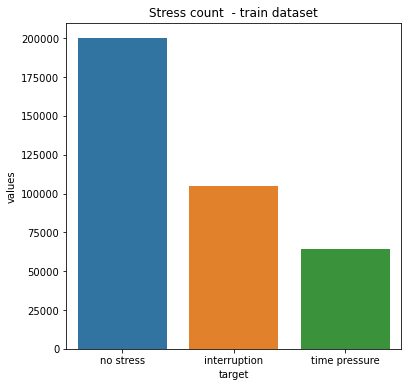

In [16]:
## Checking for the number of value counts in target field
valCount = application_train["condition"].value_counts()
print(valCount)
df = pd.DataFrame({'target': valCount.index,
                   'values': valCount.values
                  })
plt.figure(figsize = (6,6))
plt.title('Stress count  - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'target', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

# Data PreProcessing

In [10]:
# Diving data into feature and target set
X = application_train.drop(['condition'], axis=1)
y = application_train.condition
feature_name = X.columns.tolist()

## Data Normalization

In [11]:
X_norm = MinMaxScaler().fit_transform(X)

## Feature Selection 

In [12]:
#Chi-Square selct k-best for feature selection
chi_selector = SelectKBest(chi2, k=25)
chi_selector.fit(X_norm, y)

SelectKBest(k=25, score_func=<function chi2 at 0x7f85fe036430>)

In [13]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

25 selected features


In [14]:
print("Chi-Square selected features: ",chi_feature)

Chi-Square selected features:  ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'HR', 'pNN25', 'pNN50', 'SD1', 'SD2', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'higuci']


In [15]:
#removing insignificant features
X = X[chi_feature]
feature_name = X.columns.tolist()

## Train test dataset

In [16]:
# Initializing train data 
X_train =X
y_train=y
# Initializing terst data 
X_test= application_test[chi_feature]
y_test=application_test.condition

## Label Encoding

In [17]:
#Initializing Label Encoder
le = LabelEncoder()
#Fit label encoder
le.fit(y_train)

LabelEncoder()

In [18]:
#Transforming labels to normalized encoding.
y_train= le.transform(y_train)
y_test= le.transform(y_test)

In [19]:
y_train,y_test

(array([1, 0, 0, ..., 1, 1, 1]), array([1, 2, 1, ..., 1, 1, 2]))

# Neural Network

In [20]:
# Training Neural Network
neuralNet = MLPClassifier(random_state=1, max_iter=30)
neuralNet.fit(X_train, y_train)

MLPClassifier(max_iter=30, random_state=1)

In [21]:
ypred= neuralNet.predict(X_test)

In [22]:
neuralNet.score(X_test, y_test)

0.7842955669826724

In [23]:
acc=accuracy_score(y_test,ypred)
acc

0.7842955669826724

In [24]:
f1=f1_score(ypred,y_test,average='micro')
f1

0.7842955669826724

In [25]:
print("Classification report \n ", classification_report(y_test,ypred))


Classification report 
                precision    recall  f1-score   support

           0       0.80      0.76      0.78     11782
           1       0.76      0.94      0.84     22158
           2       0.94      0.34      0.49      7093

    accuracy                           0.78     41033
   macro avg       0.83      0.68      0.71     41033
weighted avg       0.80      0.78      0.76     41033



In [1]:
ps= precision_score(y_test, ypred, average='weighted')
ps

NameError: name 'precision_score' is not defined